# Question 1

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import numpy as np

In [2]:
startups=pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Assignments\\005. Multi linear Regression\\50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startups=startups.rename({'R&D Spend':'r_d','Administration':'admin','Marketing Spend':'marketing','State':'state','Profit':'profit'},axis=1)
startups.head()

,r_d,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
# Correlation

startups.corr()

,r_d,admin,marketing,profit
r_d,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


### Scatterplot with variables

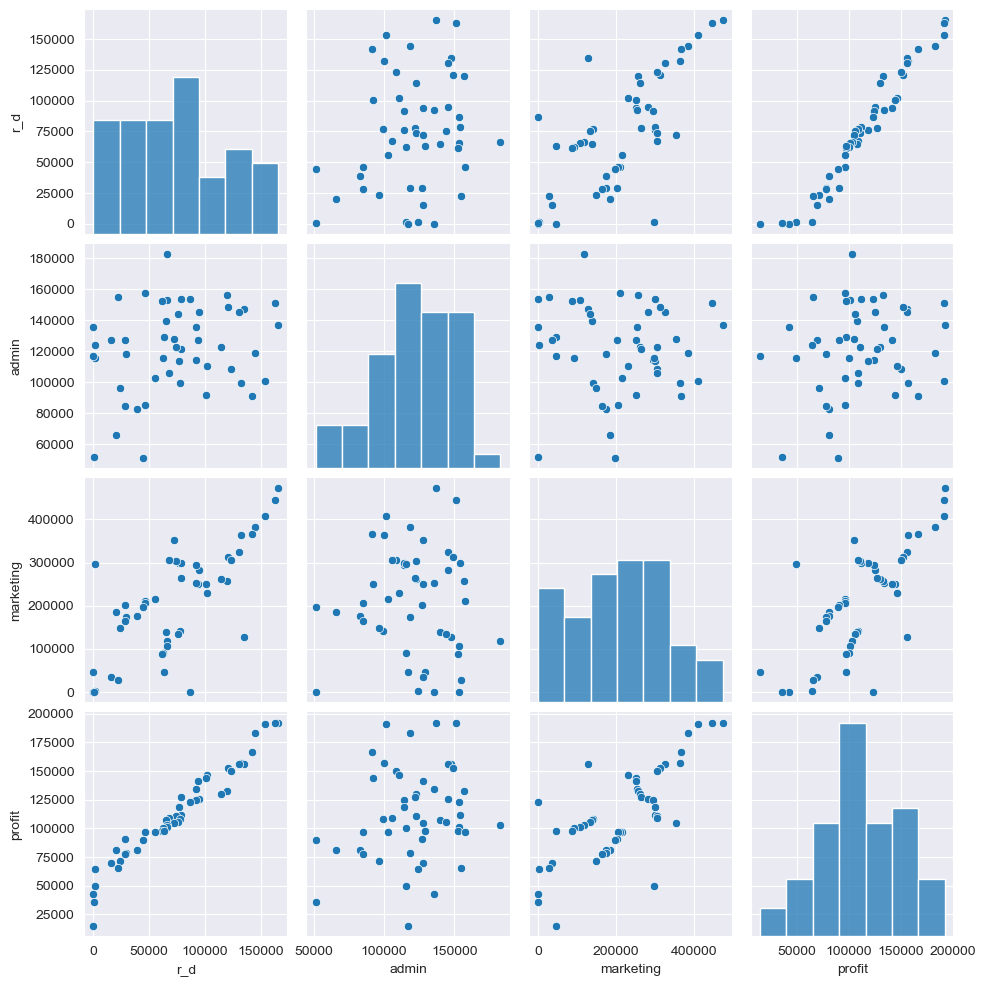

In [7]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [8]:
# Build model
import statsmodels.formula.api as smf
model=smf.ols('profit~r_d+admin+marketing',data=startups).fit()

In [9]:
# Beta coefficiets
model.params

Intercept    50122.192990
r_d              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [10]:
# t-values and p-values
print("t-values: ",'\n',model.tvalues,'\n',
      "p-values: ",'\n',model.pvalues)

t-values:  
 Intercept     7.626218
r_d          17.846374
admin        -0.525507
marketing     1.655077
dtype: float64 
 p-values:  
 Intercept    1.057379e-09
r_d          2.634968e-22
admin        6.017551e-01
marketing    1.047168e-01
dtype: float64


In [11]:
np.round(model.pvalues,5)

Intercept    0.00000
r_d          0.00000
admin        0.60176
marketing    0.10472
dtype: float64

In [12]:
# r-squared value
print("R-squared value: ",model.rsquared,'\n',
     "Adjusted R-squared value: ",model.rsquared_adj)

R-squared value:  0.9507459940683246 
 Adjusted R-squared value:  0.9475337762901719


### Now building simple linear models  with profit ~ admin and profit ~ marketing

In [13]:
model_ad=smf.ols('profit~admin',data=startups).fit()
print(model_ad.tvalues,'\n',model_ad.pvalues)

Intercept    3.040044
admin        1.419493
dtype: float64 
 Intercept    0.003824
admin        0.162217
dtype: float64


In [14]:
model_mar=smf.ols('profit~marketing',data=startups).fit()
print(model_mar.tvalues,'\n',model_mar.pvalues)

Intercept    7.808356
marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
marketing    4.381073e-10
dtype: float64


In [15]:
model_am=smf.ols('profit~admin+marketing',data=startups).fit()
print(model_am.tvalues,'\n',model_am.pvalues)

Intercept    1.142741
admin        2.467779
marketing    8.281039
dtype: float64 
 Intercept    2.589341e-01
admin        1.729198e-02
marketing    9.727245e-11
dtype: float64


## Model Validation
- 1. Collinearity Check
- 2. Residual Analysis

### 1. Collinearity Check

In [16]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols('r_d~admin+marketing',data=startups).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols('admin~r_d+marketing',data=startups).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols('marketing~r_d+admin',data=startups).fit().rsquared
vif_m=1/(1-rsq_m)

# creating a dataframe with VIF
d1={'Variables':['r_d','admin','marketing'],'VIF':[vif_r,vif_a,vif_m]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,VIF
0,r_d,2.468903
1,admin,1.175091
2,marketing,2.326773


### 2. Residual Analysis

- Test for Normality, Q-Q plot

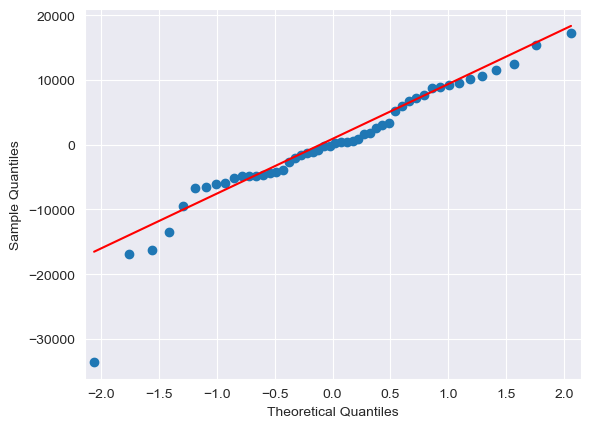

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(model.resid,line='q')
plt.title=('Normal Q-Q plot for residuals')
plt.show()

In [18]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

- Test for Homoscedasticity

In [19]:
def standard_values(vals):
    return(vals-vals.mean())/vals.std()

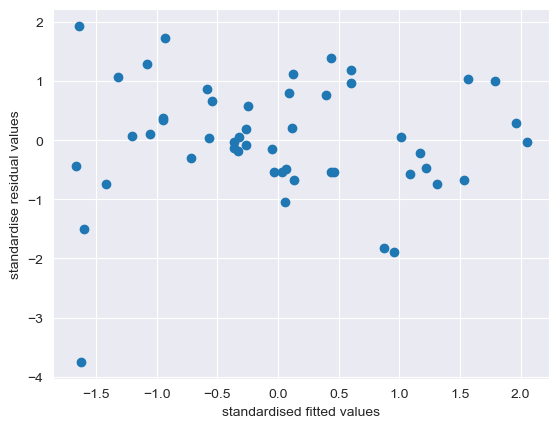

In [20]:
plt.scatter(standard_values(model.fittedvalues),
            standard_values(model.resid))
plt.xlabel('standardised fitted values')
plt.ylabel('standardise residual values')
plt.show()

In [21]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

eval_env: 1


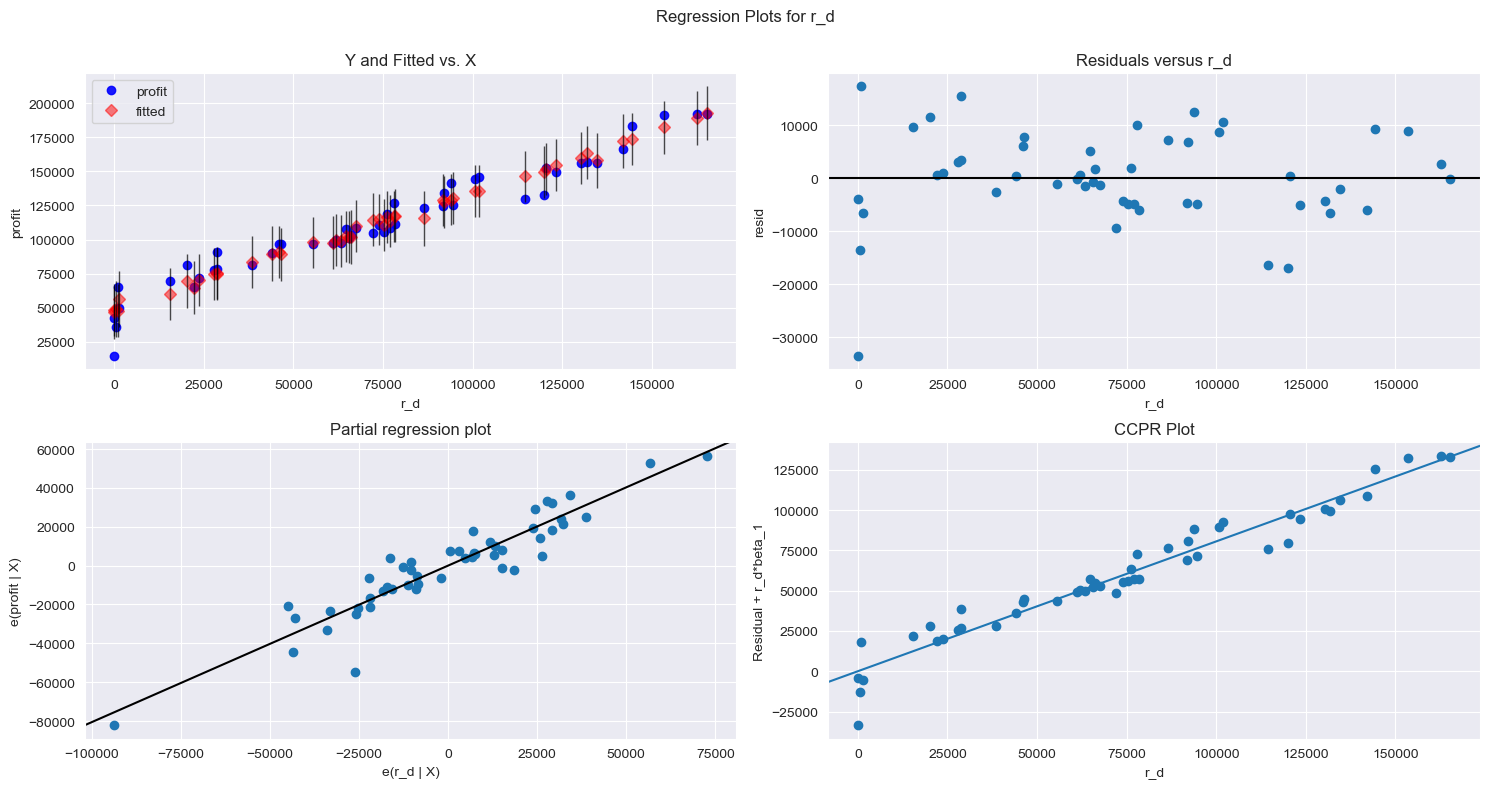

In [22]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'r_d',fig=fig)
plt.show()

eval_env: 1


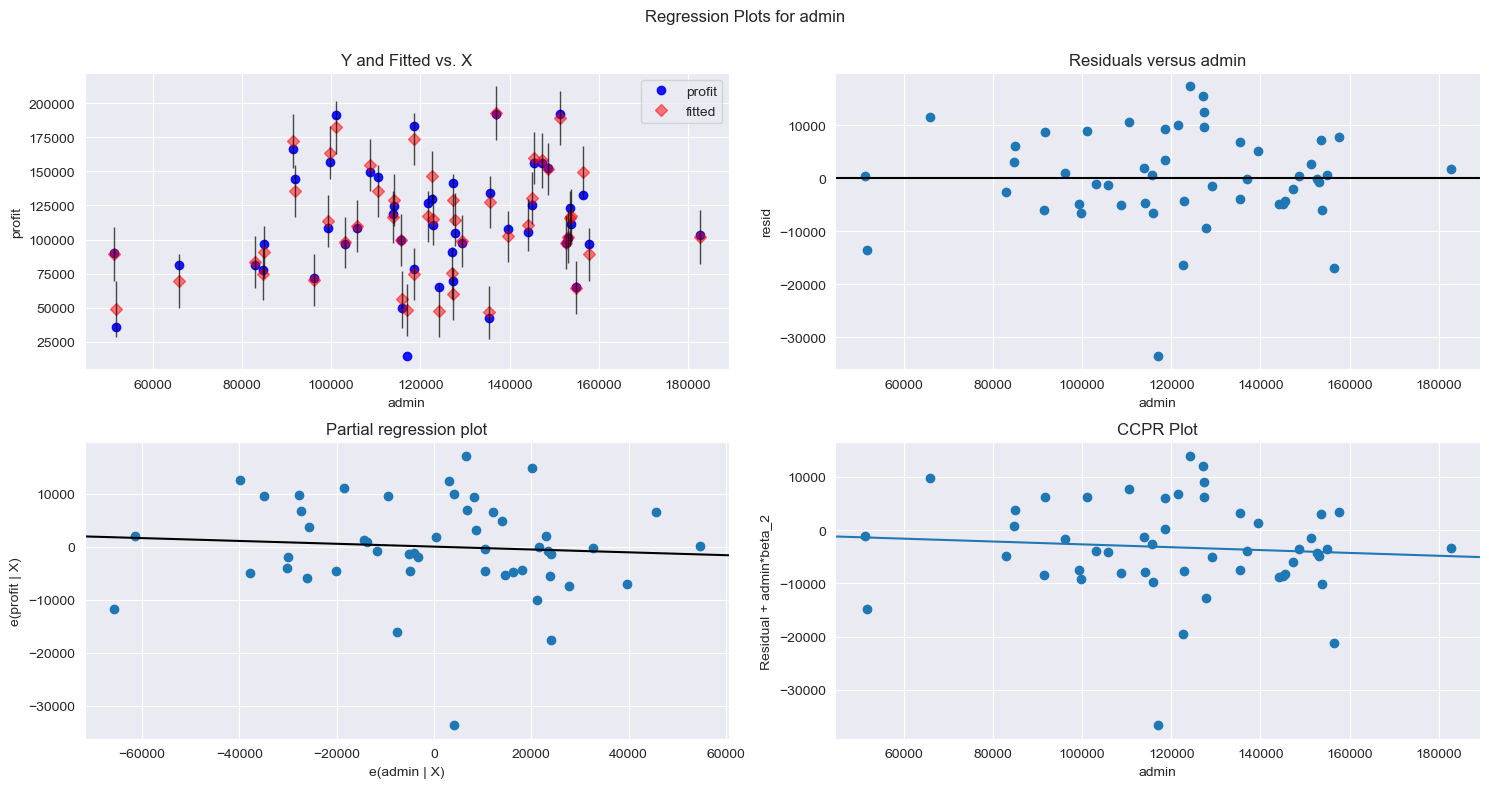

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'admin',fig=fig)
plt.show()

eval_env: 1


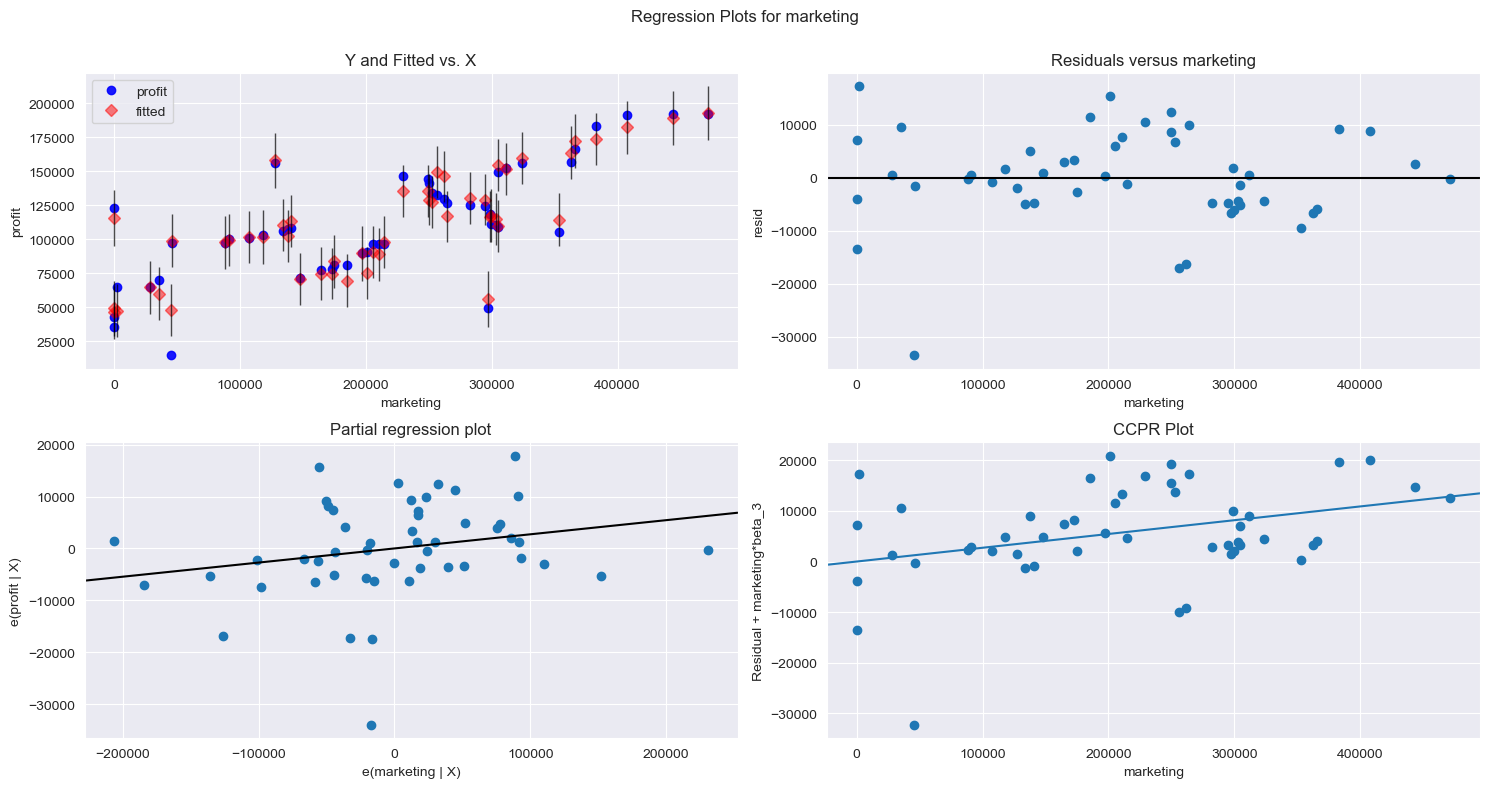

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'marketing',fig=fig)
plt.show()

## Model deletion Diagonostics
- 1. Cook's Distance
- 2. Leverage Value

### 1. Cook's Distance

In [25]:
# If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

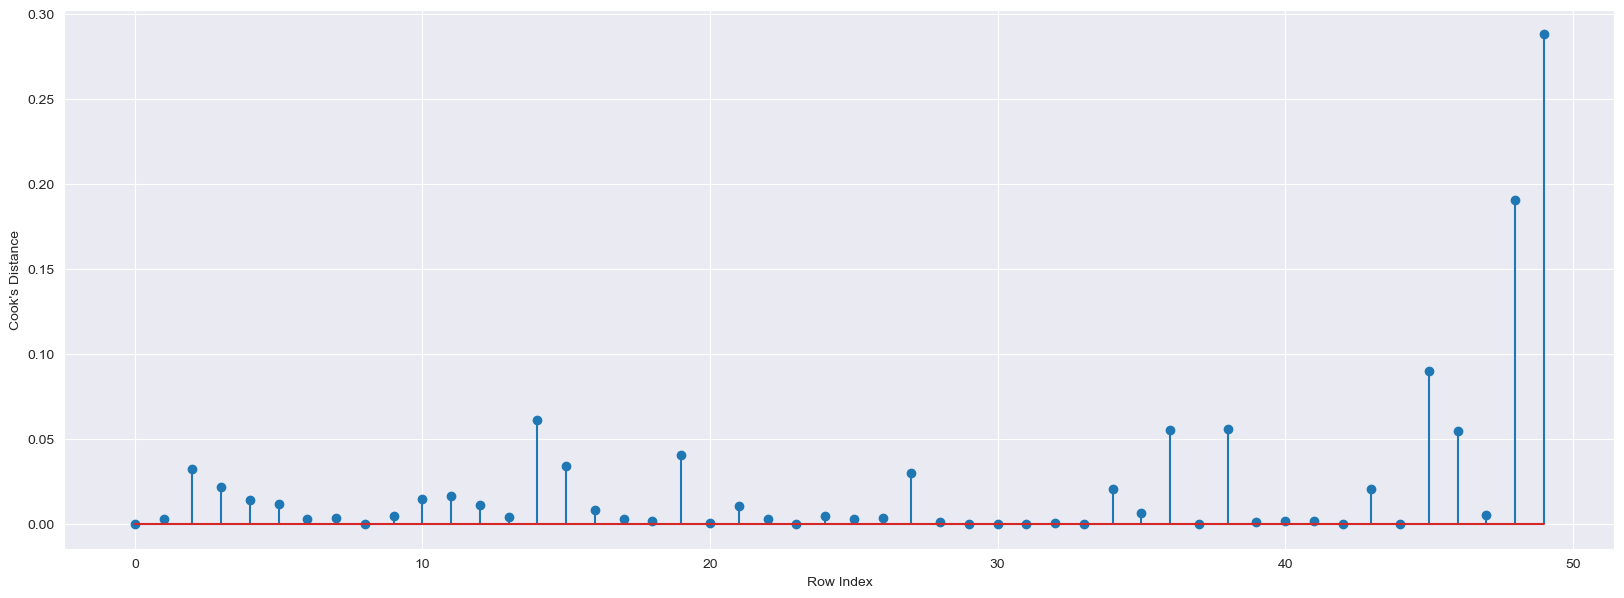

In [26]:
# Plot the influencers using the stem plot

fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c,5))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [27]:
# index and value of influencer > 0.5
np.argmax(c),np.max(c)

(49, 0.2880822927543267)

### 2. Leverage Value

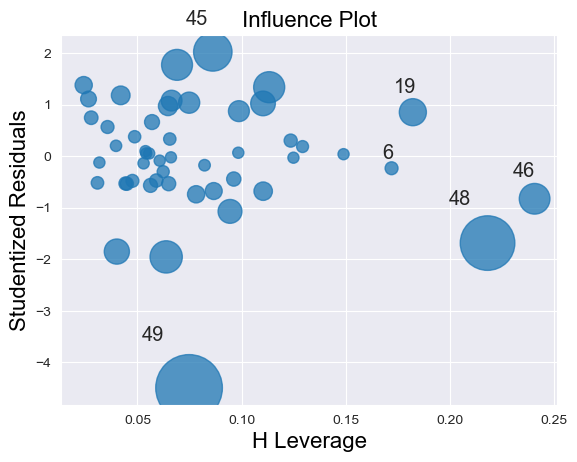

In [28]:
influence_plot(model)
plt.show()

In [29]:
# Leverage Cuttoff Value = 3*(k+1)/n
# k = no.of features/columns & n = no. of datapoints

k=startups.shape[1]
n=startups.shape[0]
leverage_cutoff=(3*(k+1)/n)
leverage_cutoff

0.36

In [30]:
startups[startups.index.isin([49])]

,r_d,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [31]:
startups.head()

,r_d,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Improving the model

In [32]:
# Remove the data points which are influencers and reassign the row number
startups_final=startups.drop(startups.index[[49]],axis=0).reset_index(drop=True)
startups_final

,r_d,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Final model

In [33]:
while np.max(c)>0.5:
    model=smf.ols('profit~r_d+admin+marketing',data=startups_final).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    startups_final=startups_final.drop(startups_final.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startups_final
else:
    final_model=smf.ols('profit~r_d+admin+marketing',data=startups_final).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [34]:
final_model=smf.ols('profit~r_d+admin+marketing',data=startups_final).fit()
print("R-squared value: ",final_model.rsquared)

R-squared value:  0.9613162435129847


In [35]:
# Model Prediction
new_data=pd.DataFrame({'r_d':70000,"admin":90000,"marketing":140000},index=[0])
new_data

,r_d,admin,marketing
0,70000,90000,140000


In [36]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [37]:
pred_y=final_model.predict(startups_final)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## Table containing R-squared value

In [38]:
dic={'prep_model':['model','final_model'],'R-squared value':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(dic)
table

,prep_model,R-squared value
0,model,0.950746
1,final_model,0.961316


# Question 2

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)


cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)


CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [39]:
import numpy as np
import pandas as pd

In [40]:
toyota=pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Assignments\\005. Multi linear Regression\\ToyotaCorolla.csv",encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [41]:
toyota.shape

(1436, 38)

In [42]:
# required data
toyo=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyo

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [43]:
toyo=toyo.rename({'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','cc':'cc','Doors':'doors',
                 'Gears':'gears','Quarterly_Tax':'tax','Weight':'weight'},axis=1)
toyo

,price,age,km,hp,cc,doors,gears,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [44]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   km      1436 non-null   int64
 3   hp      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   doors   1436 non-null   int64
 6   gears   1436 non-null   int64
 7   tax     1436 non-null   int64
 8   weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [45]:
toyo.shape

(1436, 9)

In [46]:
toyo[toyo.duplicated()]

,price,age,km,hp,cc,doors,gears,tax,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [47]:
toyo=toyo.drop_duplicates().reset_index(drop=True)
toyo

,price,age,km,hp,cc,doors,gears,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [48]:
toyo[toyo.duplicated()]

,price,age,km,hp,cc,doors,gears,tax,weight


In [49]:
toyo.describe()

,price,age,km,hp,cc,doors,gears,tax,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [50]:
toyo.isna().sum()

price     0
age       0
km        0
hp        0
cc        0
doors     0
gears     0
tax       0
weight    0
dtype: int64

In [51]:
# Correlation

toyo.corr()

,price,age,km,hp,cc,doors,gears,tax,weight
price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## Scatter plot with variables

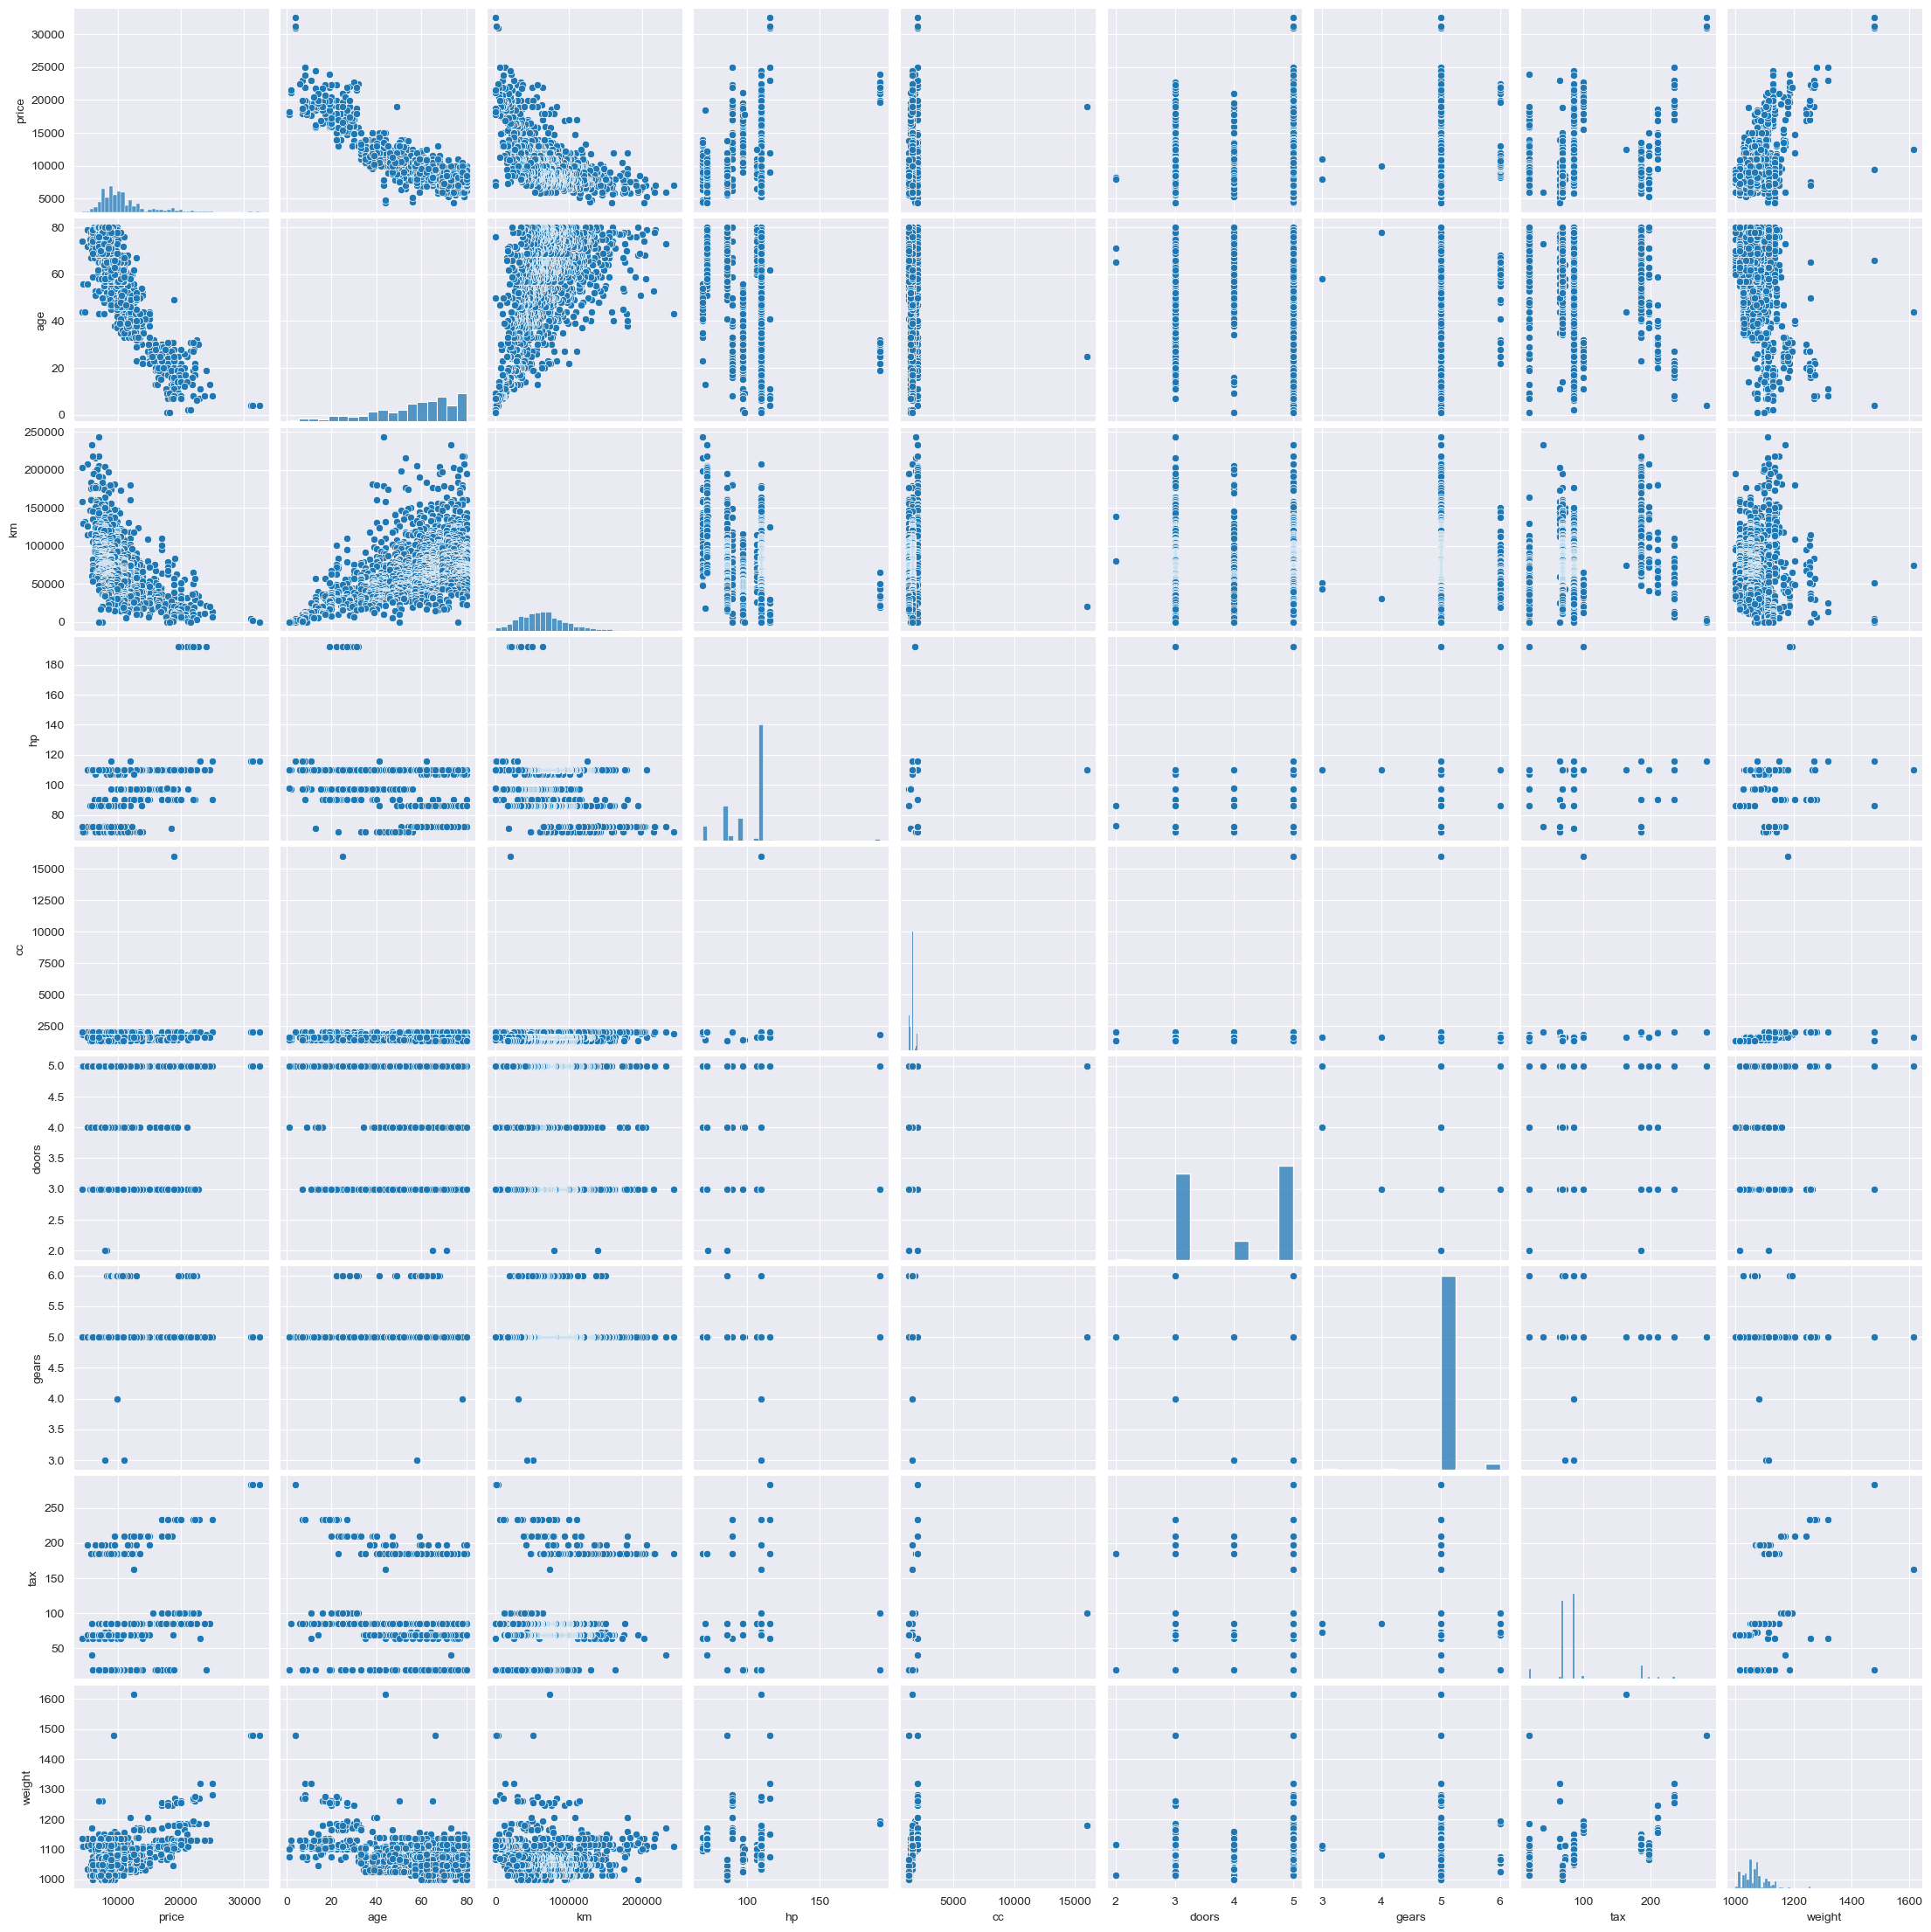

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
sns.pairplot(toyo)
plt.show()

## Building models

In [53]:
import statsmodels.formula.api as smf
model=smf.ols('price~age+km+hp+cc+doors+gears+tax+weight',data=toyo).fit()

In [54]:
# model parameters
model.params

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
tax             3.858805
weight         16.855470
dtype: float64

In [55]:
print("t-value: ",model.tvalues,'\n',
     "p-value: ",np.round(model.pvalues,5))

t-value:  Intercept    -3.875273
age         -46.551876
km          -16.552424
hp           11.209719
cc           -1.316436
doors        -0.023012
gears         3.034563
tax           2.944198
weight       15.760663
dtype: float64 
 p-value:  Intercept    0.00011
age          0.00000
km           0.00000
hp           0.00000
cc           0.18824
doors        0.98164
gears        0.00245
tax          0.00329
weight       0.00000
dtype: float64


In [56]:
# Finding R-squared values
model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

### Building linear models

In [57]:
model_cc=smf.ols('price~cc',data=toyo).fit()
model_cc.tvalues,model_cc.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [58]:
model_do=smf.ols('price~doors',data=toyo).fit()
model_do.tvalues,model_do.pvalues

(Intercept    19.421546
 doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 doors        2.404166e-12
 dtype: float64)

In [59]:
model_cd=smf.ols('price~cc+doors',data=toyo).fit()
model_cd.tvalues,model_cd.pvalues

(Intercept    12.786341
 cc            4.268006
 doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 doors        2.109558e-11
 dtype: float64)

## Model validation

### 1. Collinearity Check

In [60]:
# VIF = 1/(1-rsquared)
rsq_age=smf.ols('age~km+hp+cc+doors+gears+tax+weight',data=toyo).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('km~age+hp+cc+doors+gears+tax+weight',data=toyo).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('hp~km+age+cc+doors+gears+tax+weight',data=toyo).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~km+age+hp+doors+gears+tax+weight',data=toyo).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('doors~km+age+cc+hp+gears+tax+weight',data=toyo).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('gears~km+age+cc+doors+hp+tax+weight',data=toyo).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_tax=smf.ols('tax~km+age+cc+doors+gears+hp+weight',data=toyo).fit().rsquared
vif_tax=1/(1-rsq_tax)

rsq_weight=smf.ols('weight~km+age+cc+doors+gears+tax+hp',data=toyo).fit().rsquared
vif_weight=1/(1-rsq_weight)

# putting these in a dataframe
d={'Varisbles':['age','km','hp','cc','doors','gears','tax','weight'],
  'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_weight]}
vif_df=pd.DataFrame(d)
vif_df

,Varisbles,VIF
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,tax,2.295375
7,weight,2.487180


### Residual Analysis

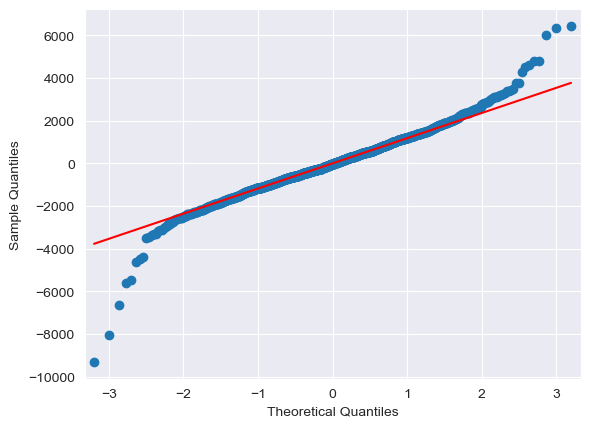

In [61]:
# Test for Normality of Residuals (Q-Q Plot) using residual model
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(model.resid,line='q')
plt.show()

In [62]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [63]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [64]:
# Test for Homoscadasticity
def standard_values(vals):
    return(vals-vals.mean())/vals.std()

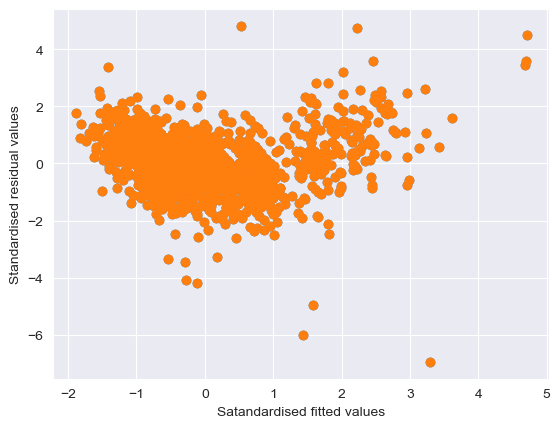

In [66]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.xlabel('Satandardised fitted values')
plt.ylabel('Standardised residual values')
plt.show()

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors

In [67]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

eval_env: 1


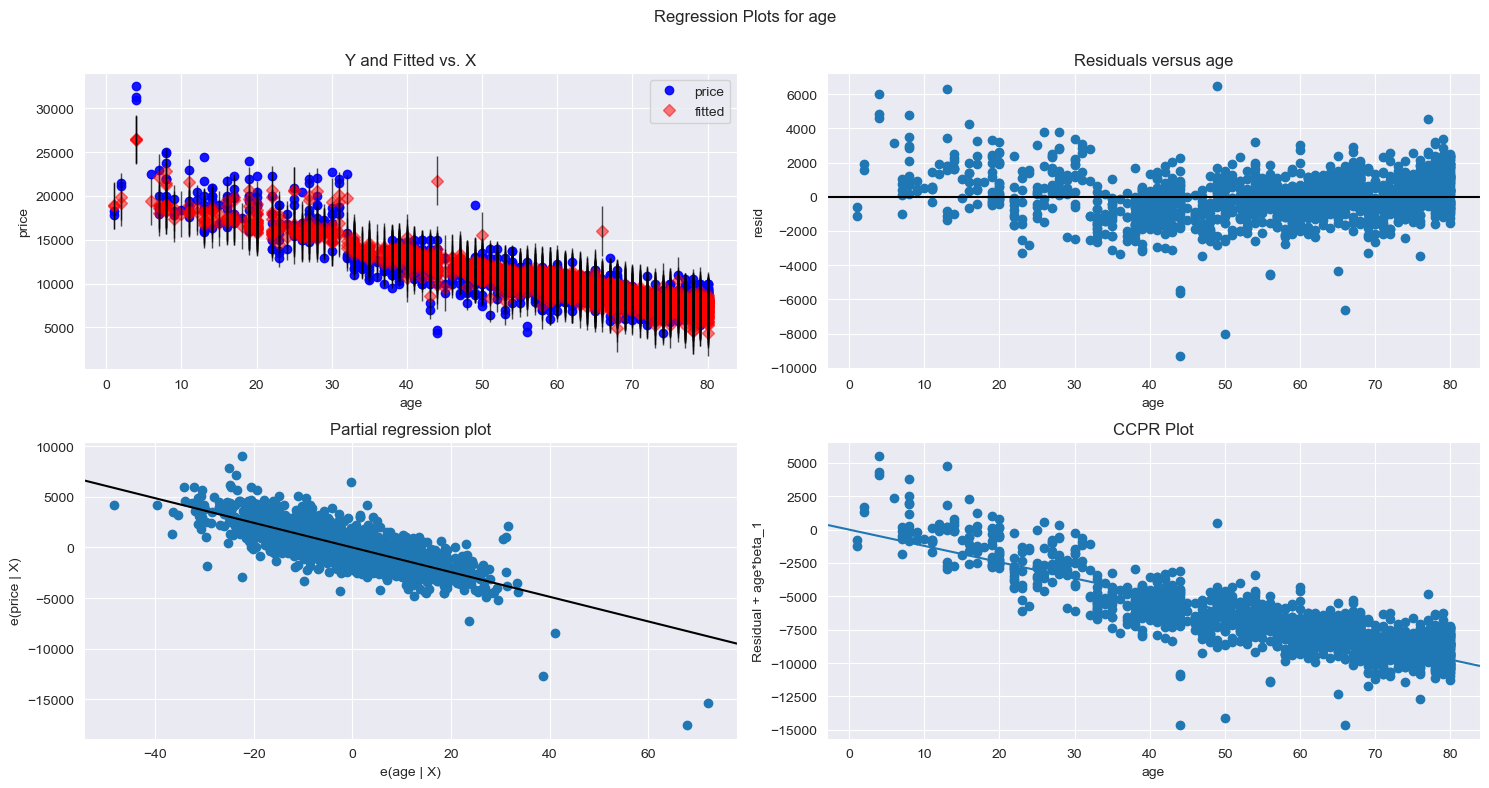

In [69]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

eval_env: 1


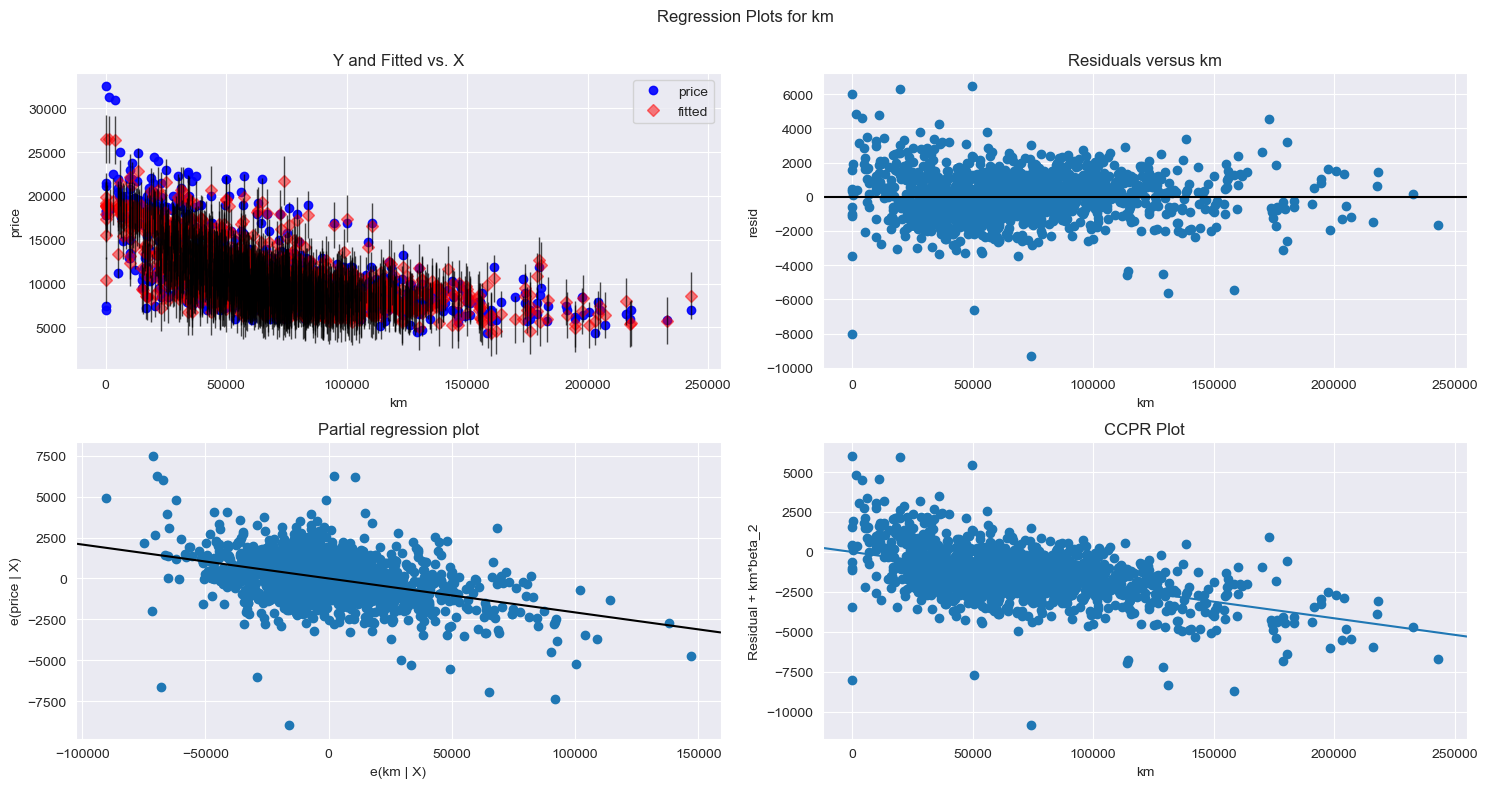

In [70]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'km',fig=fig)
plt.show()

eval_env: 1


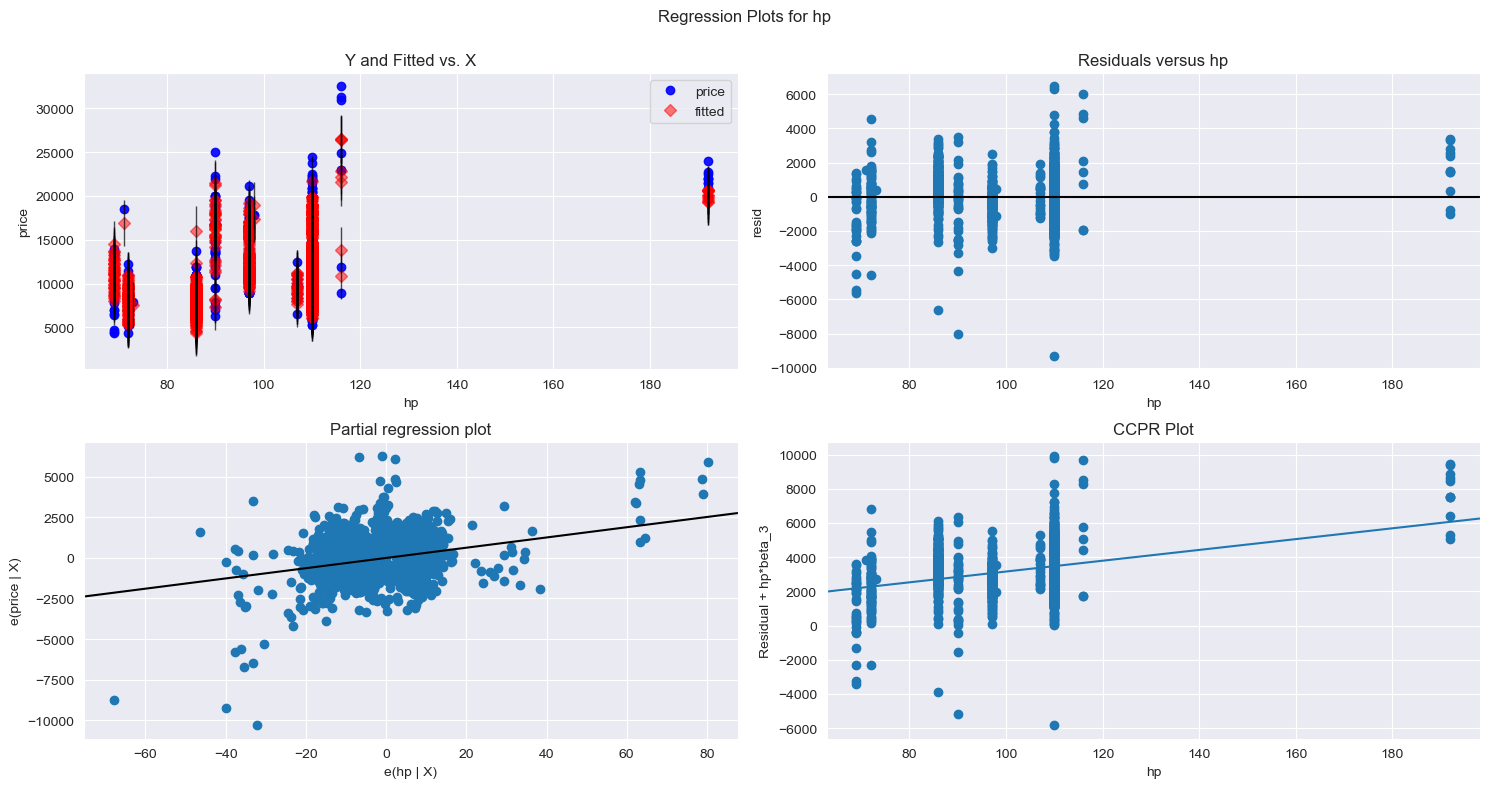

In [71]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'hp',fig=fig)
plt.show()

eval_env: 1


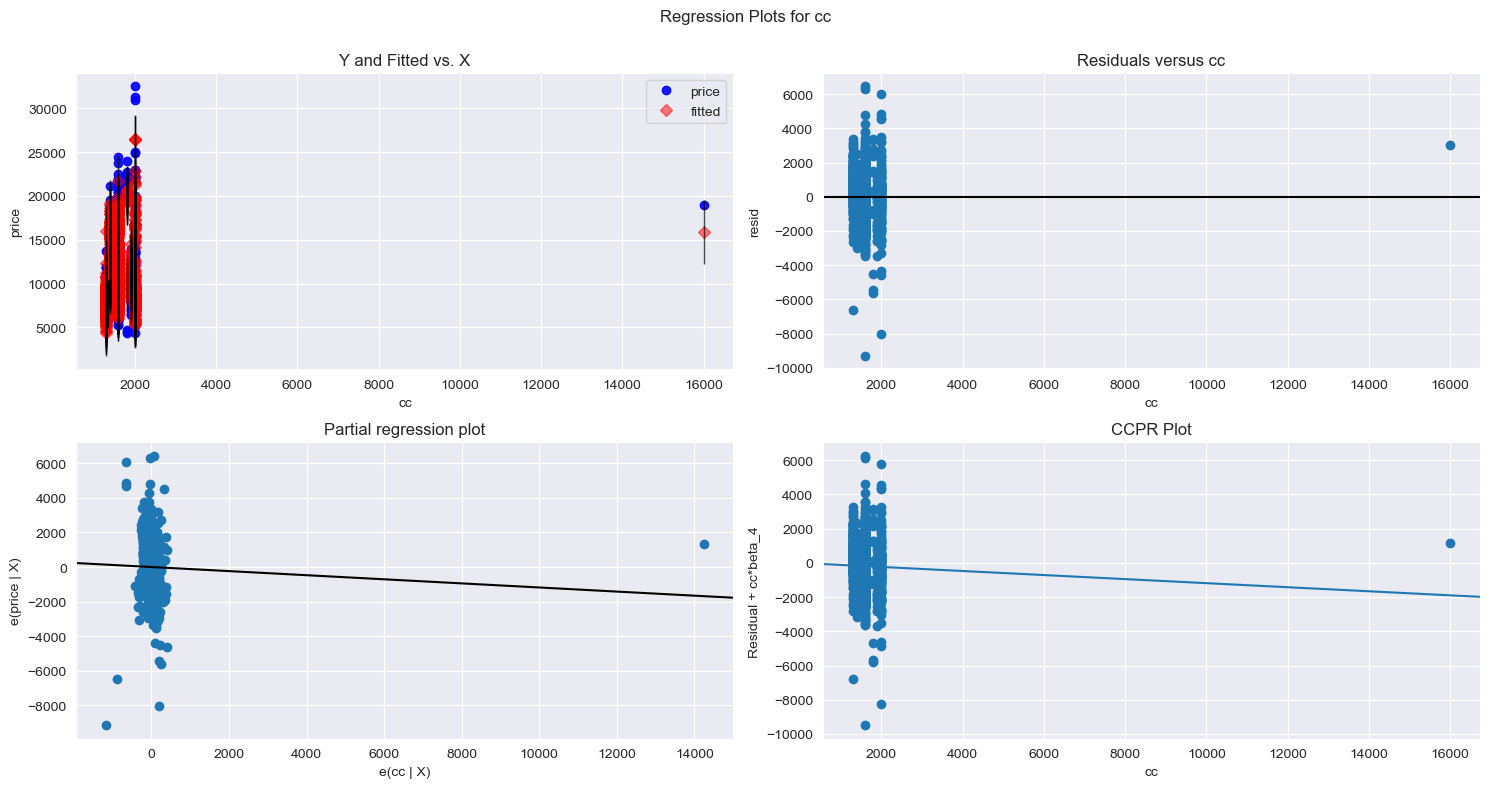

In [72]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


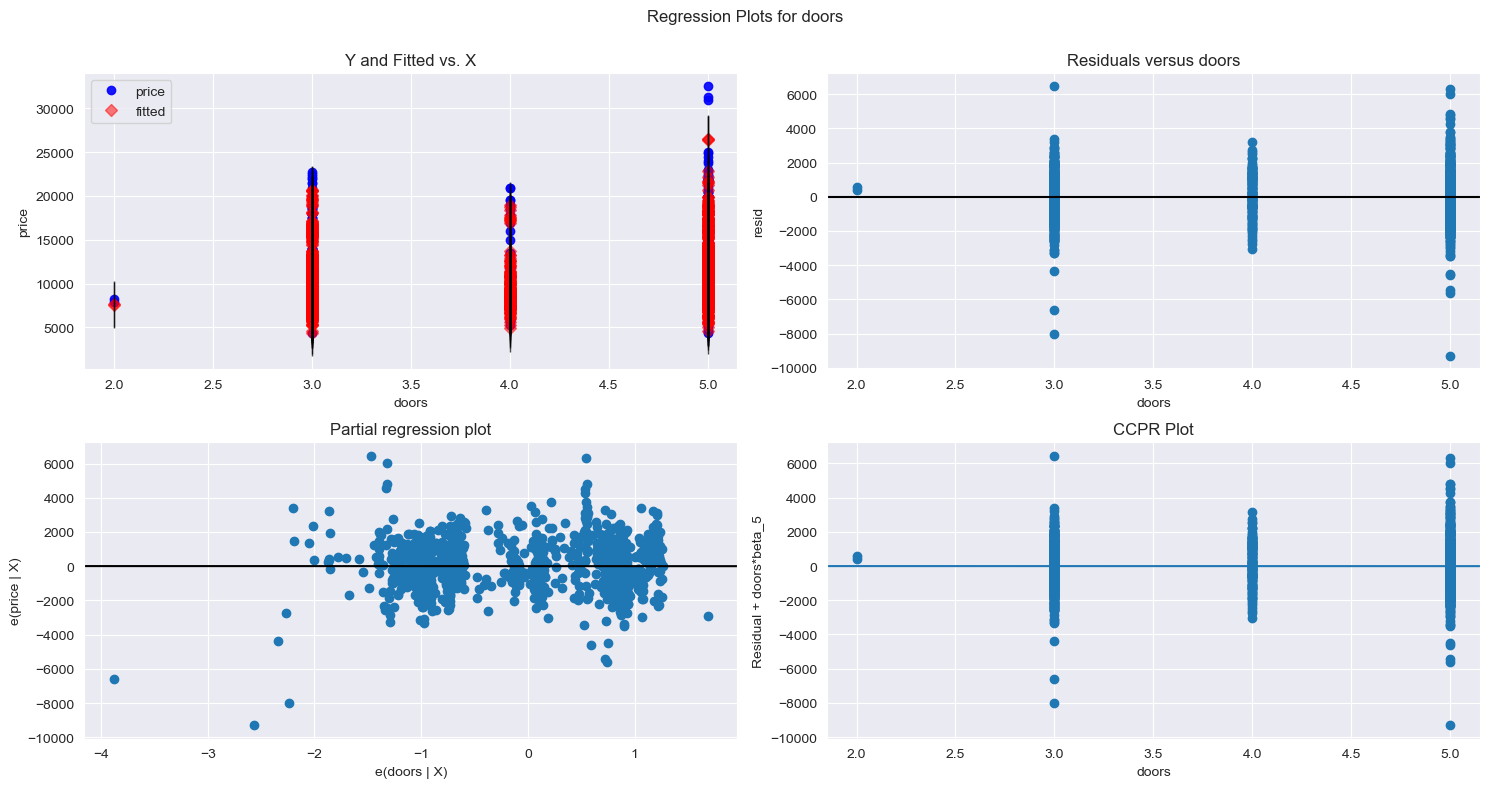

In [73]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show()

eval_env: 1


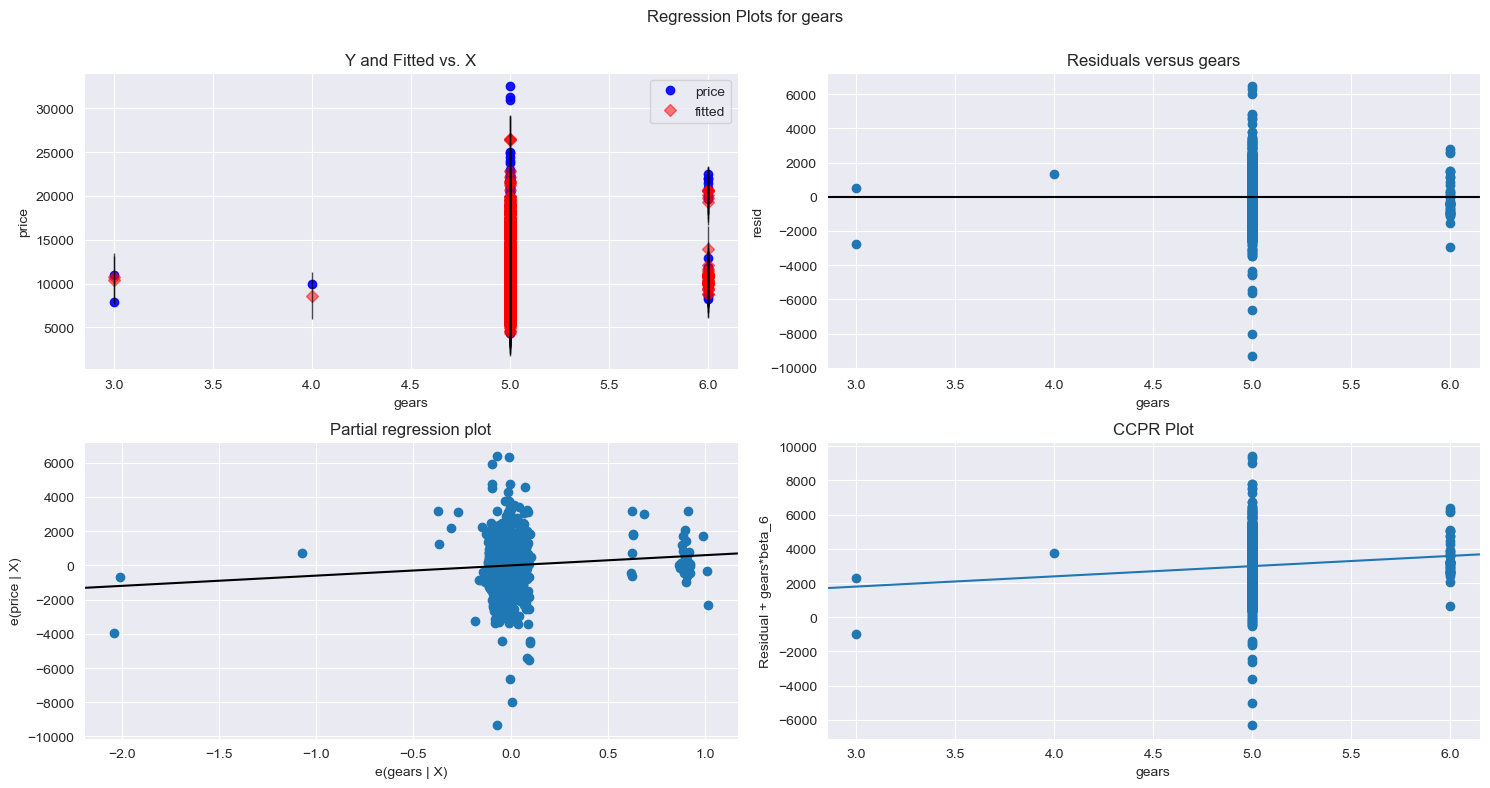

In [74]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'gears',fig=fig)
plt.show()

eval_env: 1


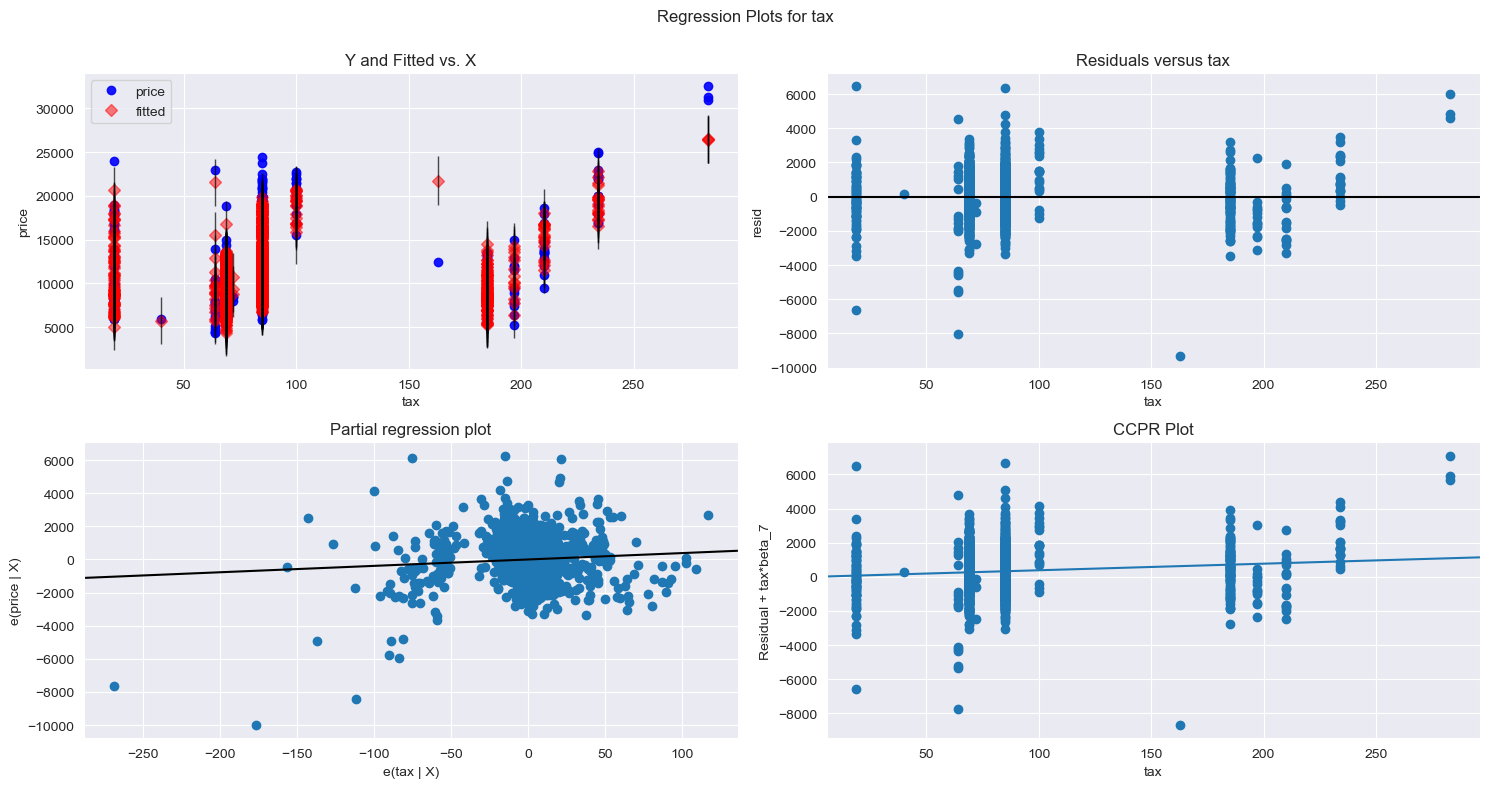

In [75]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'tax',fig=fig)
plt.show()

eval_env: 1


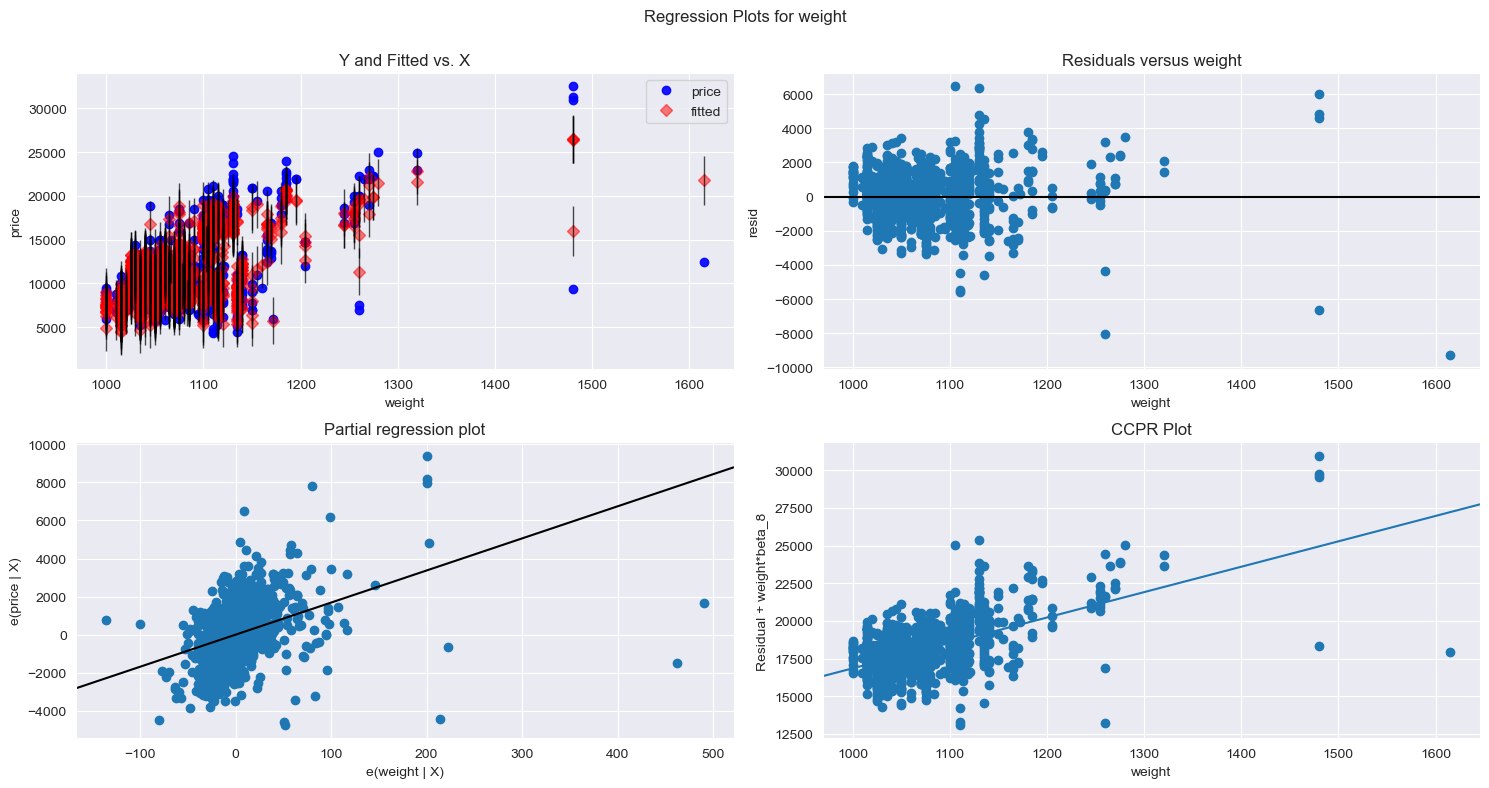

In [76]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'weight',fig=fig)
plt.show()

## Model Deletion

### 1. Cook's distance

In [77]:
# If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

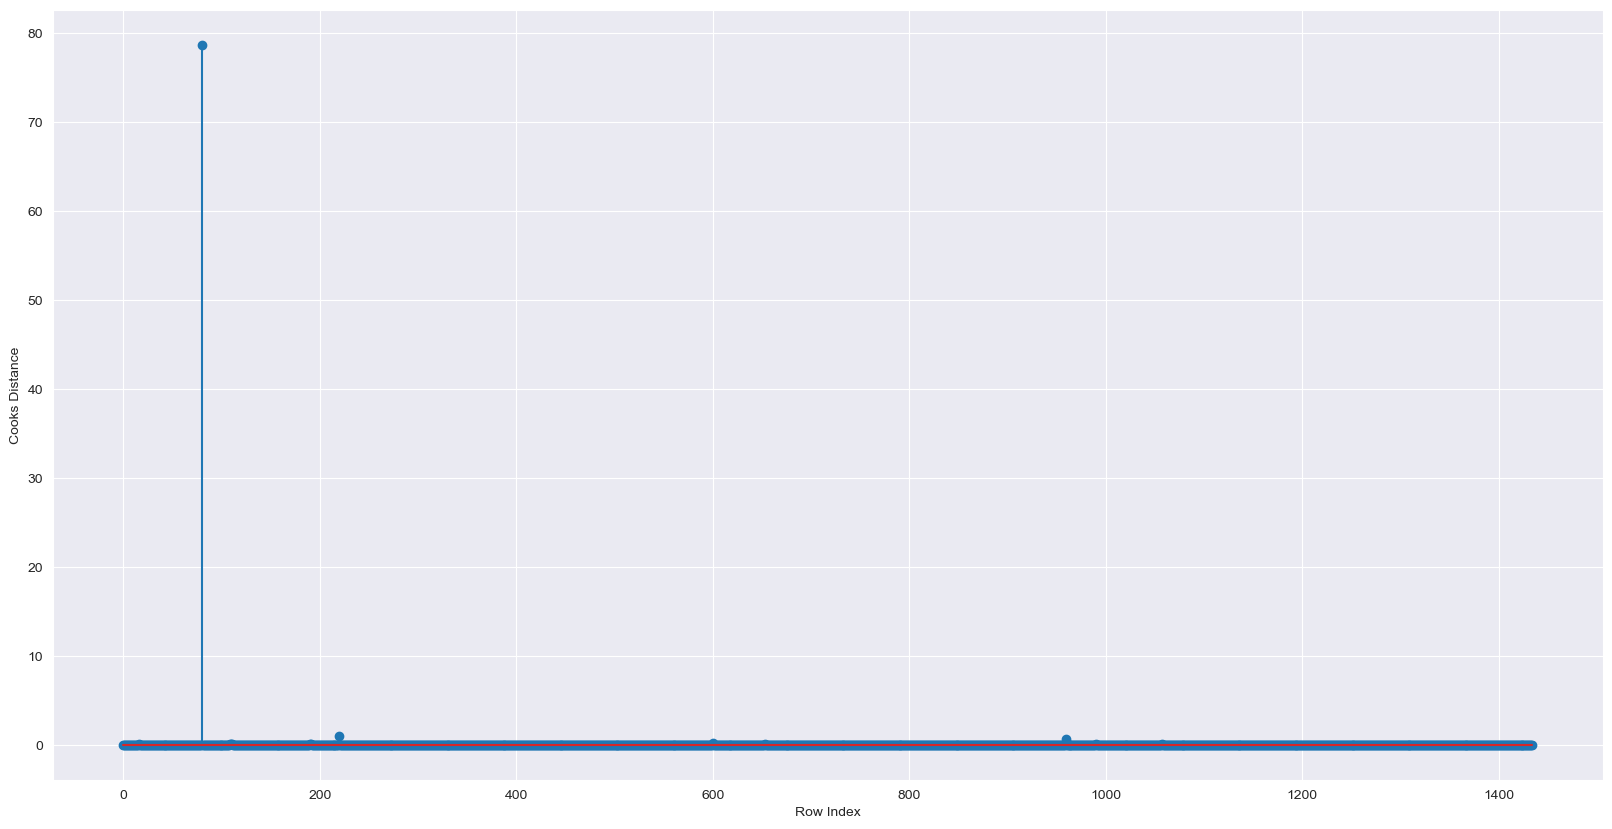

In [81]:
fig=plt.figure(figsize=(20,10))
plt.stem(np.arange(len(toyo)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [82]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224984)

### 2. Leverage value

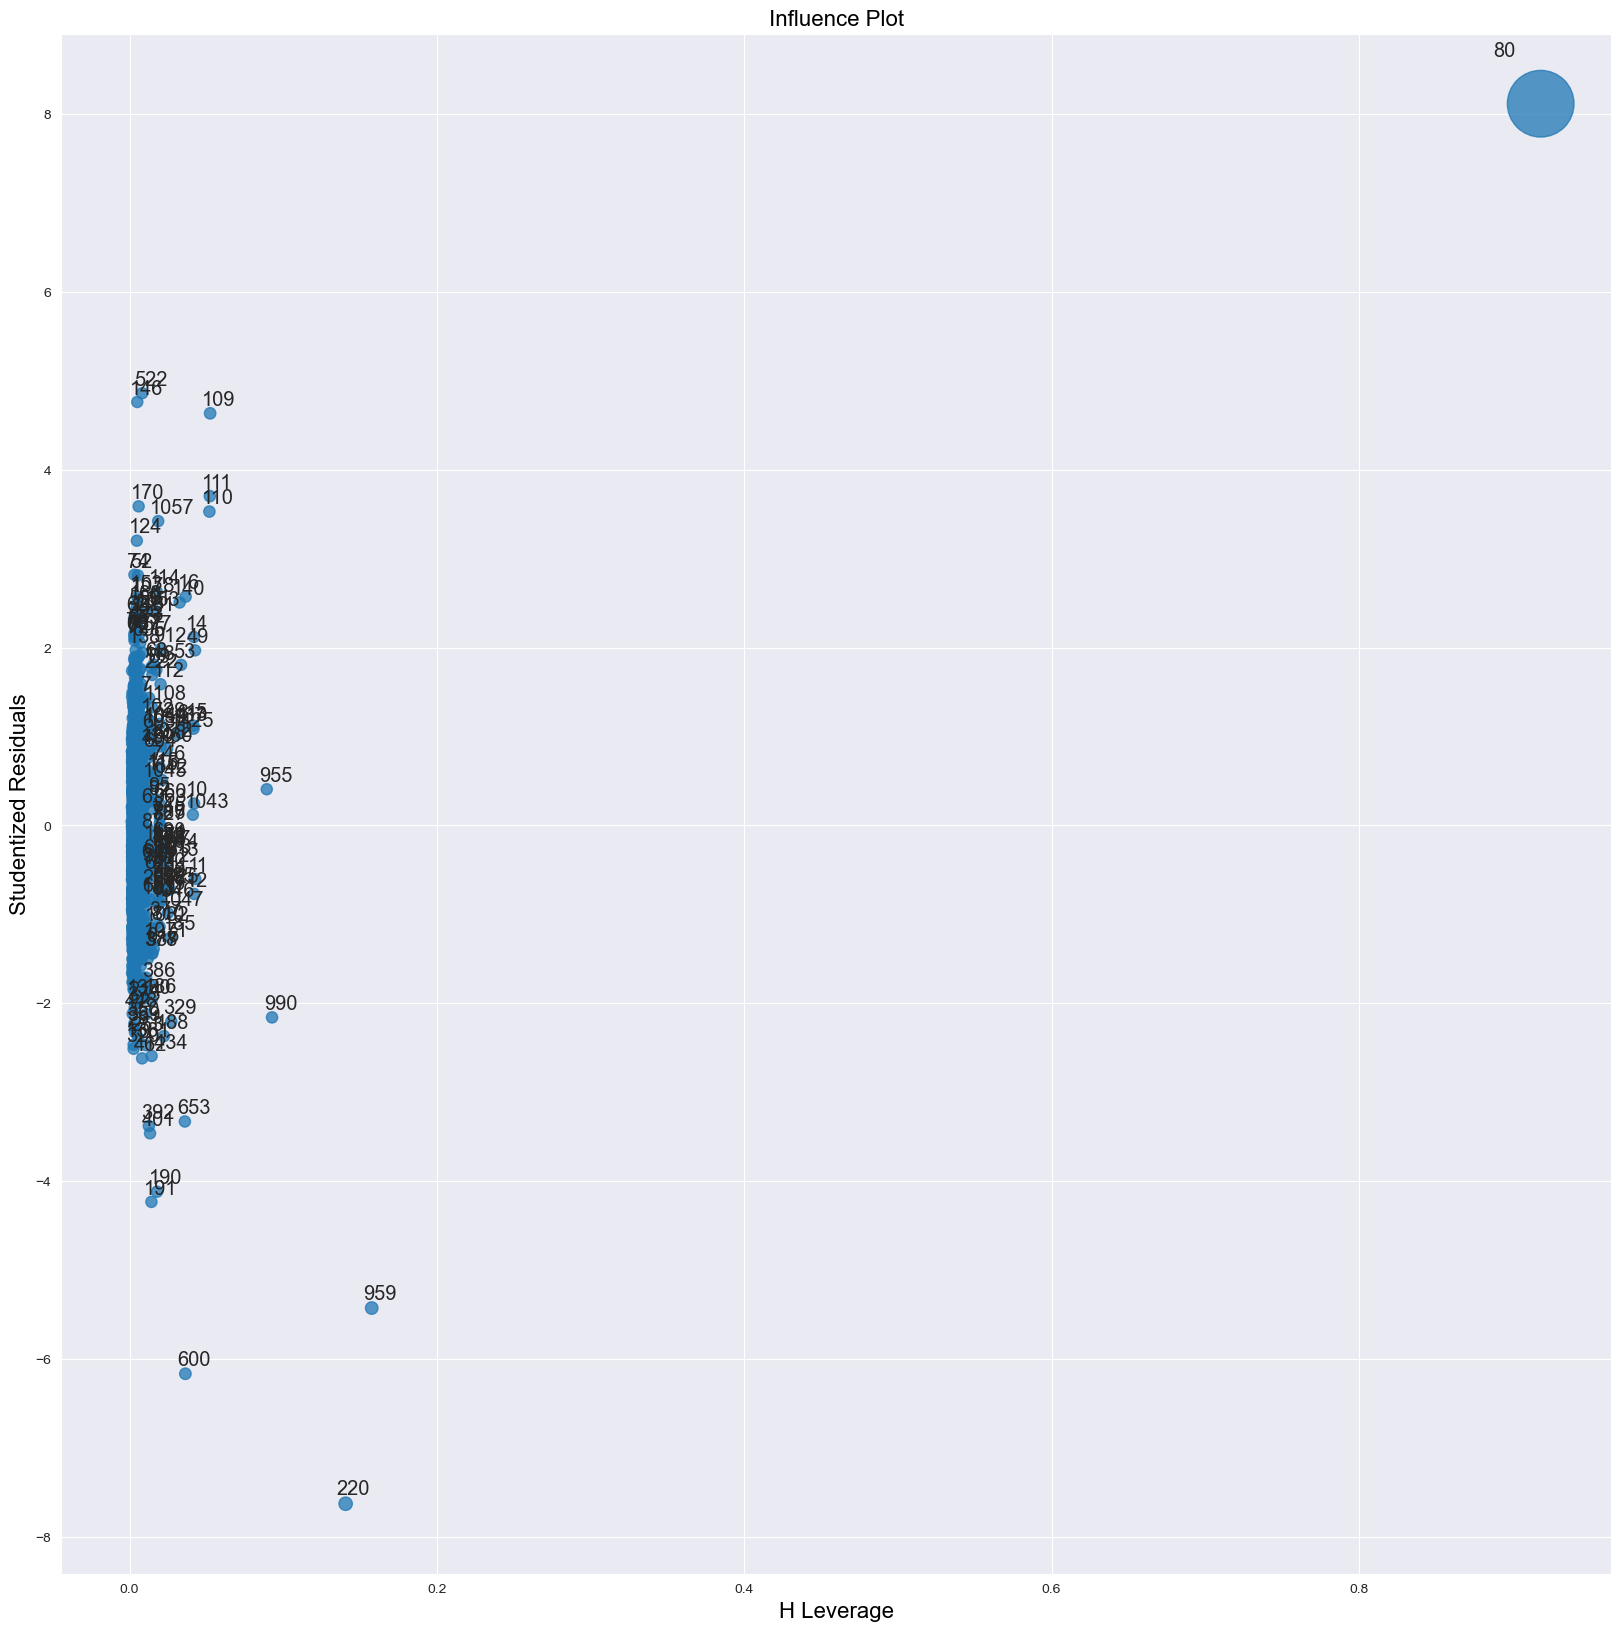

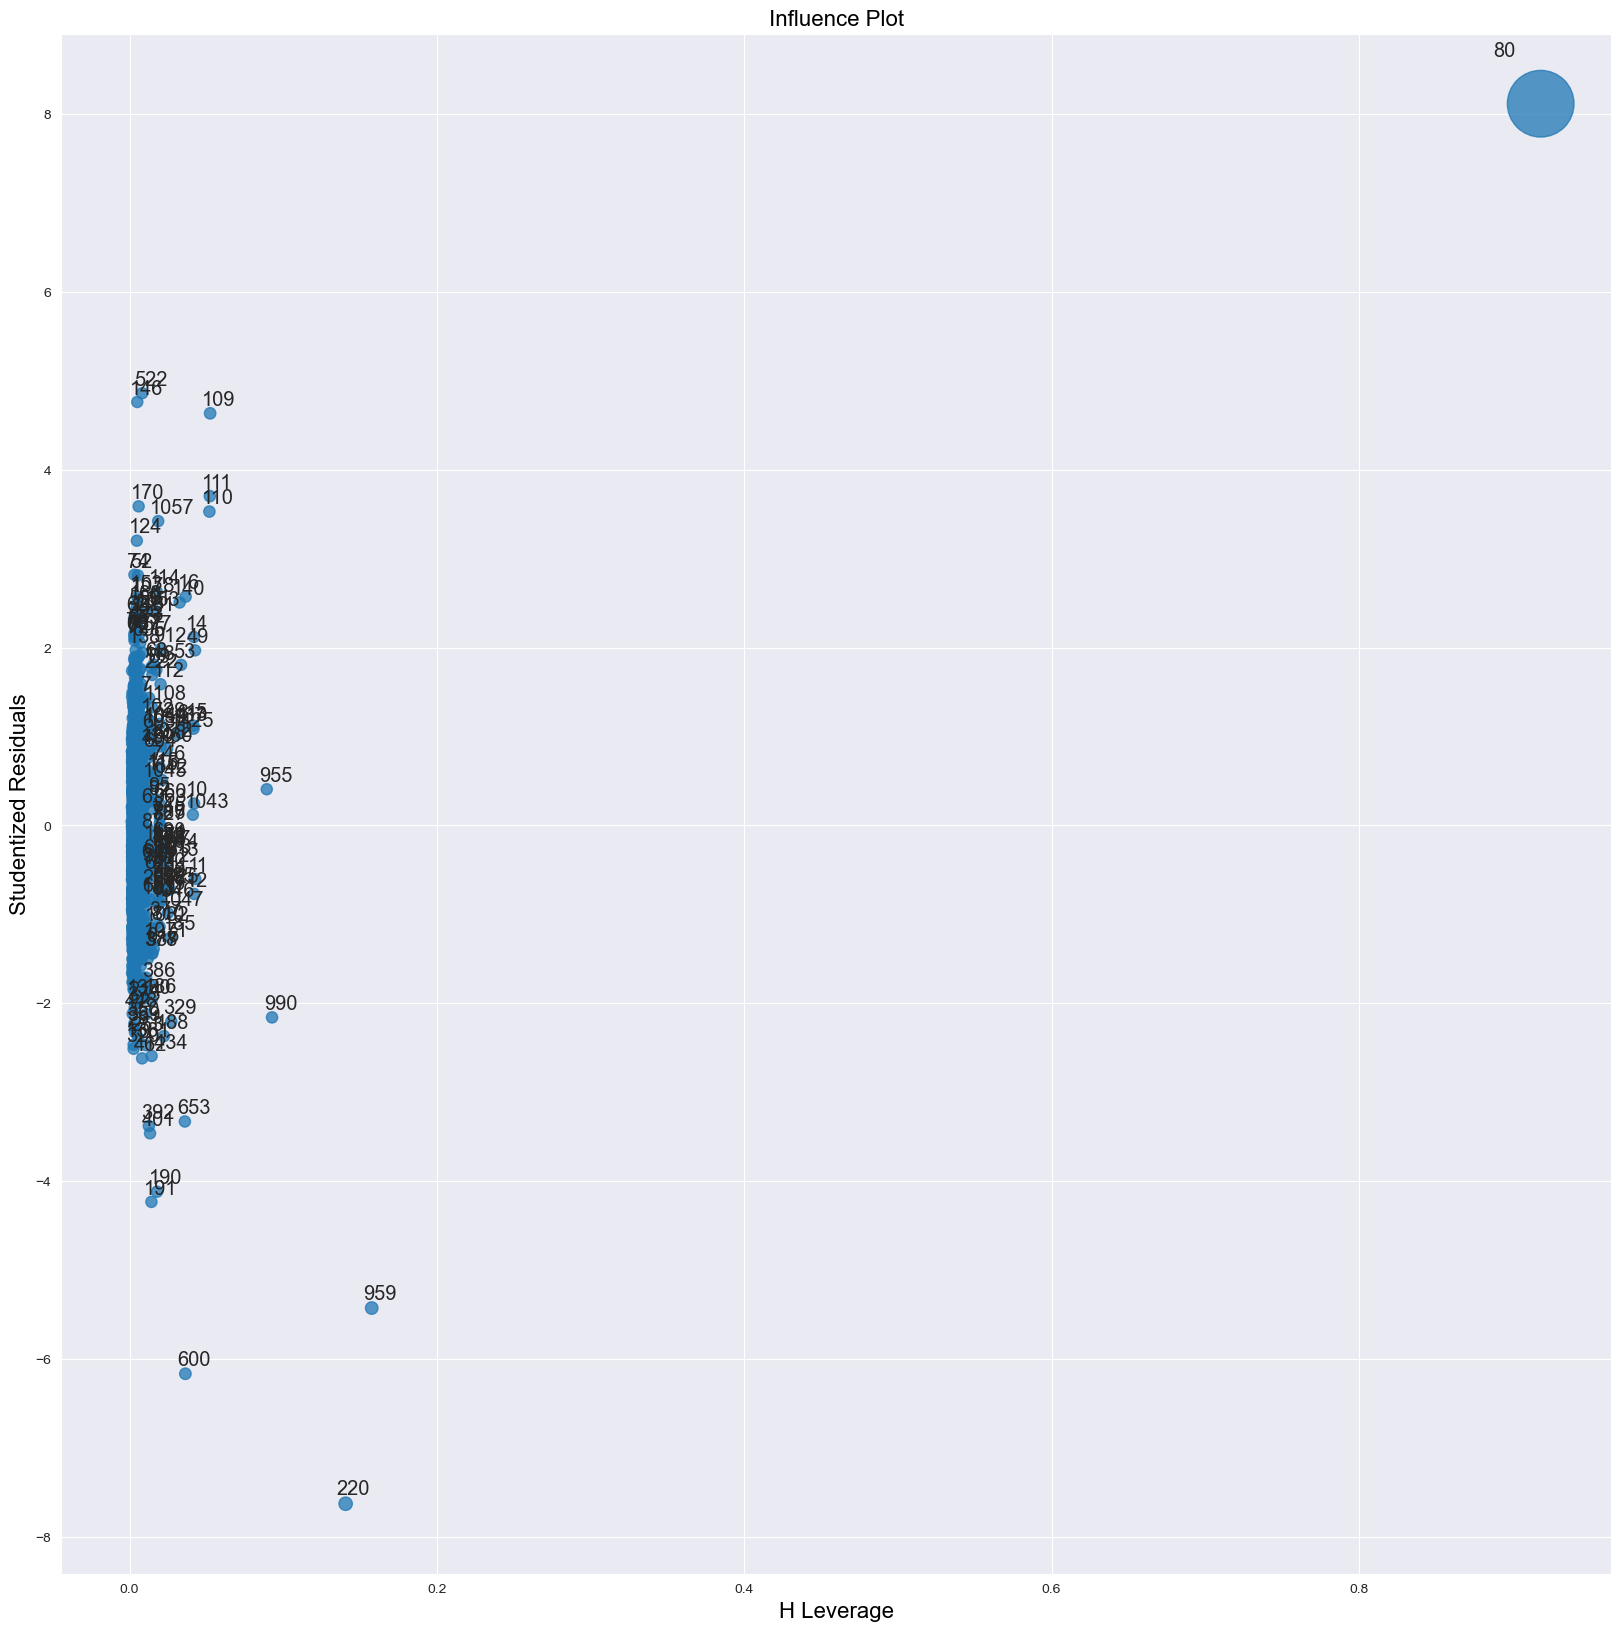

In [84]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)
plt.show()

#### Leverage cut off value

- Leverage Cuttoff Value = 3*(k+1)/n 

- k = no.of features/columns & n = no. of datapoints 

In [85]:
k=toyo.shape[1]
n=toyo.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [86]:
toyo[toyo.index.isin([80])]

,price,age,km,hp,cc,doors,gears,tax,weight
80,18950,25,20019,110,16000,5,5,100,1180


### Improving the model

In [88]:
toyo_final=toyo.drop(toyo.index[[80]],axis=0).reset_index(drop=True)
toyo_final

,price,age,km,hp,cc,doors,gears,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Detecting final model

In [94]:
while np.max(c)>0.5:
    model=smf.ols('price~age+km+hp+cc+doors+gears+tax+weight',data=toyo).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    toyo=toyo.drop(toyo.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo
else:
    final_model=smf.ols('price~age+km+hp+cc+doors+gears+tax+weight',data=toyo).fit()
    final_model.rsquared
    print("Thus model accuracy is improved to ",final_model.rsquared)

Thus model accuracy is improved to  0.8882395145171204


In [95]:
final_model.rsquared

0.8882395145171204

## Model Predictions

In [96]:
new_data=pd.DataFrame({"age":12,"km":40000,"hp":80,"cc":1300,"doors":4,"gears":5,"tax":69,"weight":1012},index=[0])
new_data

,age,km,hp,cc,doors,gears,tax,weight
0,12,40000,80,1300,4,5,69,1012


In [97]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [98]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo_final)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1429     9161.230587
1430     8536.091326
1431     8681.531063
1432     8793.668694
1433    10860.695492
Length: 1434, dtype: float64